# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Data Collection & Analysis

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
# Loading 5 data from Dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Finding the number of rows and columns in the DataFrame
df.shape

(200, 5)

In [5]:
# Getting information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Checking for the null or missing values from the DataFrame
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Storing the values of  **Annual Income** and **Spendind Score** column  in X
X = df.iloc[:,[3,4]].values

In [9]:
# Values changes the dataframe into numpy array
X 

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Choosing the optimum number of clusters

###### WCSS -> Within Cluster Sum of Squares

In [10]:
# Finding wcss value for different number of clusters
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

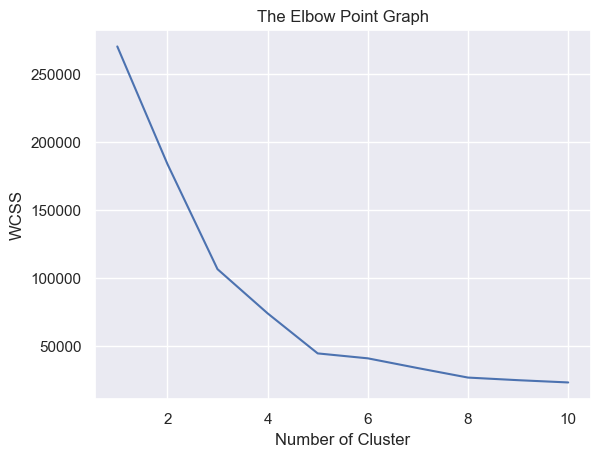

In [11]:
# Plottting an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [12]:
# From above Elbow Point Graph
# We can see there is 2 cut-off.
# One is at 3 and another at 5
# Here, we take 5 as number of clusters because after 5 there is no significant/ Sharp cut-off
# Therefore, Optimum number of Cluster = 5

# Training the K-Means Clustering Model

In [13]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
kmeans.fit(X)
# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
# print(Y)

# Visualizing the CLuster

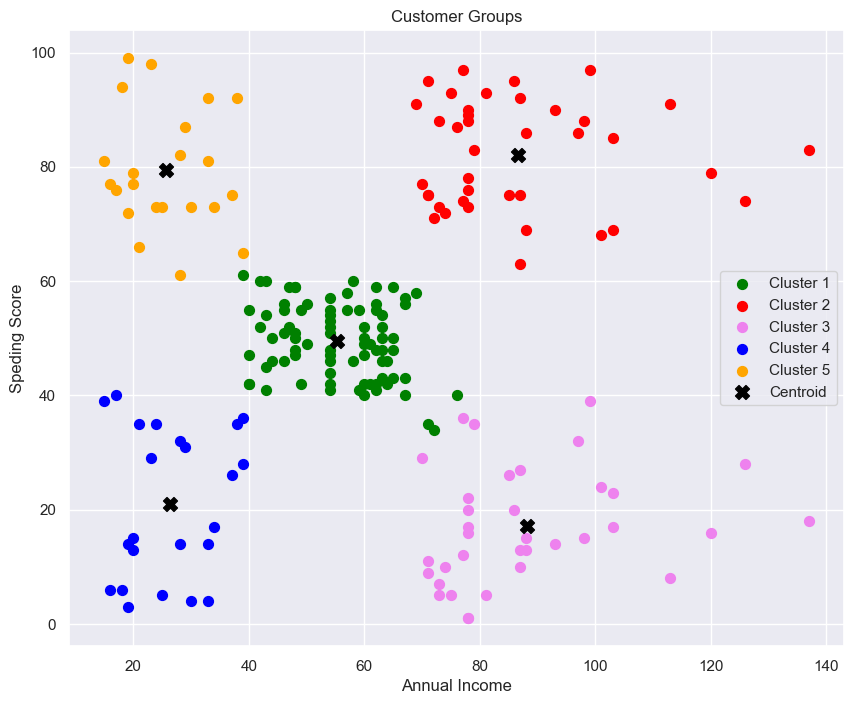

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(X[Y == 0,0], X[Y == 0,1], s=50,c='green',label='Cluster 1')
plt.scatter(X[Y == 1,0], X[Y == 1,1], s=50,c='red',label='Cluster 2')
plt.scatter(X[Y == 2,0], X[Y == 2,1], s=50,c='violet',label='Cluster 3')
plt.scatter(X[Y == 3,0], X[Y == 3,1], s=50,c='blue',label='Cluster 4')
plt.scatter(X[Y == 4,0], X[Y == 4,1], s=50,c='orange',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black',label='Centroid',marker='X')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Speding Score')
plt.legend()
plt.show()

# Key Insights

- **Cluster 1 (Green):** Represents customers with **moderate annual income** and **moderate spending scores**, forming the **middle segment** of customers.  
- **Cluster 2 (Red):** Comprises customers with **high annual income** and **high spending scores**, indicating **potential premium customers**.  
- **Cluster 3 (Voilet):** Includes customers with **high annual income** but **low spending scores**, suggesting they might be **financially conservative or dissatisfied customers**.  
- **Cluster 4 (Blue):** Consists of customers with **low annual income** and **low spending scores**, identifying them as **price-sensitive customers**.  
- **Cluster 5 (Orange):** Represents customers with **low annual income** but **high spending scores**, possibly indicating **impulse buyers or brand-loyal customers**.  


# Predicting Clusters

In [15]:
# New customer data (Annual Income, Spending Score)
new_data = np.array([[25, 50], [30, 80]])

# Predict the cluster
predictions = kmeans.predict(new_data)

print("Predicted clusters:", predictions)

Predicted clusters: [3 4]


## Cluster Prediction Results

The model has assigned the following data points to their respective clusters:

- **[25, 50]** belongs to **Cluster 3**  
- **[30, 80]** belongs to **Cluster 4**  

This classification helps in understanding customer segmentation based on their annual income and spending scores.


In [16]:
# import joblib
# joblib.dump(kmeans,'D:\Python\Customer_Segmentation\customer_segmentation_model.pkl')